## closed form soln for regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
datax,datay = make_regression(n_samples = 500,n_features = 1,noise = 10)
datax.shape,datay.shape

((500, 1), (500,))

In [4]:
#normalise data
x = (datax - datax.mean())/datax.std()
y = datay.reshape(-1,1)
y.shape

(500, 1)

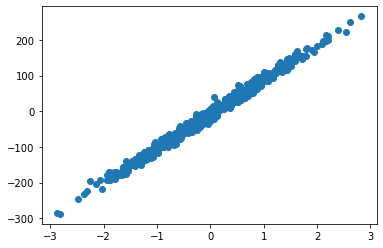

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
#add a feature x[0] = 1 for each sample
ones = np.ones((x.shape[0],1))
x_ = np.hstack((x,ones))
x_.shape

(500, 2)

In [9]:
#closed form soln

def predict(x,theta):
    return np.dot(x,theta)
#theta = [[(X.T)*X]**-1]*[(X.T)*Y]
def get_theta_closedForm(X,Y):
    Y = np.mat(Y)
    first_value = np.dot(X.T,X)
    print(first_value.shape)
    second_value = np.dot(X.T,Y)
    print(second_value.shape)
    theta = np.linalg.pinv(first_value)*second_value
    return theta

In [10]:
final_theta = get_theta_closedForm(x_,y)
prediction = predict(x_,final_theta)
#change matrix to array.
answer = np.array(prediction)
print(final_theta)

(2, 2)
(2, 1)
[[96.12889998]
 [-6.42261533]]


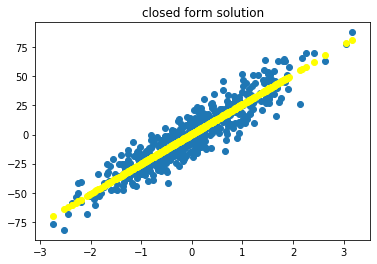

In [257]:
plt.figure()
plt.scatter(x,y)
plt.scatter(x,answer,color = 'yellow')
plt.title('closed form solution')
plt.show()